In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
burst_list = pd.read_excel('burst_list.xlsx')
burst_list.sample(5)

,date,time,type,instruments,time_start,time_end,date_start,date_end,datetime_start,datetime_end
9045,20220427,12:04-12:12,III,SWISS-MUHEN,12:04,12:12,20220427,20220427,2022-04-27 12:04:00,2022-04-27 12:12:00
15836,20220815,16:48-16:54,III,MRO,16:48,16:54,20220815,20220815,2022-08-15 16:48:00,2022-08-15 16:54:00
17487,20220923,12:47-12:59,VI,AUSTRIA-UNIGRAZ,12:47,12:59,20220923,20220923,2022-09-23 12:47:00,2022-09-23 12:59:00
16275,20220829,00:04-00:04,III,Australia-ASSA,00:04,00:04,20220829,20220829,2022-08-29 00:04:00,2022-08-29 00:04:00
8490,20220420,07:02-07:03,III,GLASGOW,07:02,07:03,20220420,20220420,2022-04-20 07:02:00,2022-04-20 07:03:00


In [15]:
burst_list['duration'] = burst_list['datetime_end'] - burst_list['datetime_start']

In [16]:
# Mean duration of bursts in minutes
(burst_list.duration.dt.total_seconds()/60).describe().astype(int)

count    22015
mean         9
std         75
min       -479
25%          0
50%          1
75%          5
max       1439
Name: duration, dtype: int64

In [17]:
burst_list = burst_list[burst_list.duration.dt.total_seconds() > 0]
burst_list.instruments = burst_list.instruments.str.strip()

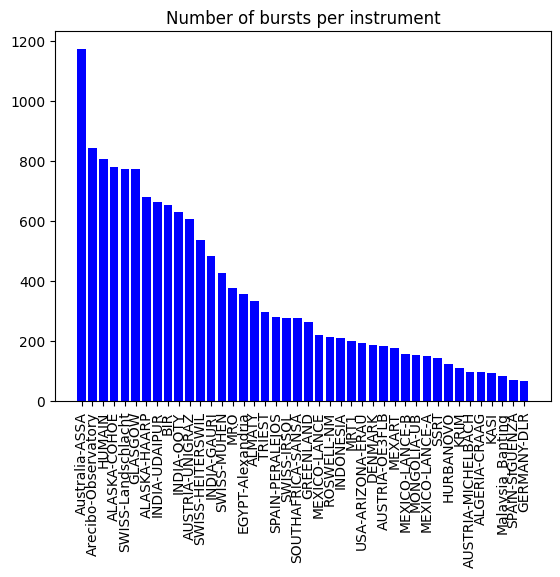

In [18]:
instrument_count = burst_list.instruments.value_counts()
instrument_count = instrument_count[instrument_count > 60]
plt.bar(instrument_count.index, instrument_count.values, color='blue')
plt.xticks(rotation=90)
plt.title('Number of bursts per instrument')
plt.show()

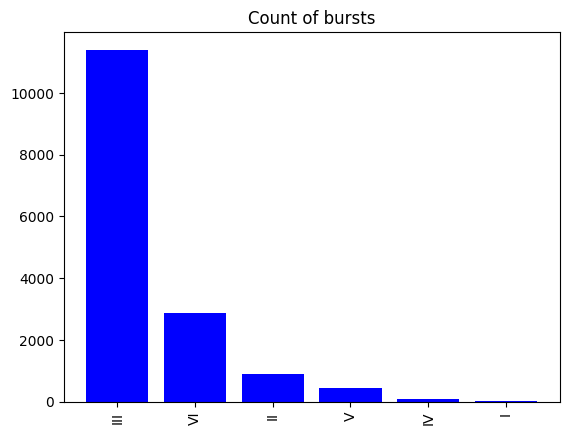

In [19]:
type_count = burst_list.type.value_counts()
plt.bar(type_count.index, type_count.values, color='blue')
plt.xticks(rotation=90)
plt.title('Count of bursts')
plt.show()

<AxesSubplot: title={'center': 'Type per top 10 instruments'}, xlabel='instruments'>

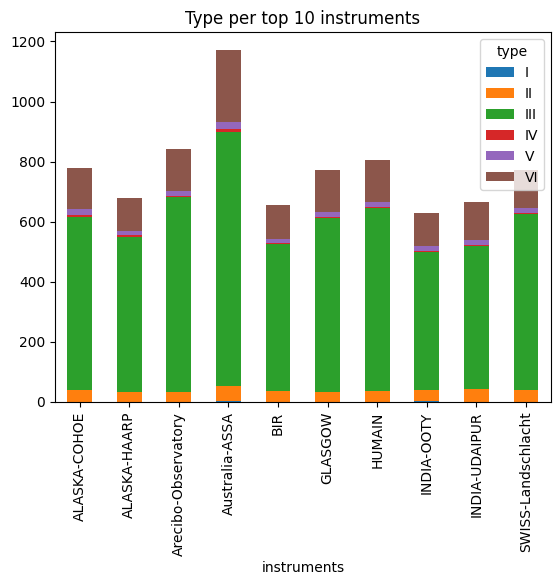

In [20]:
# Type per top 10 instruments
burst_list[burst_list.instruments.isin(instrument_count.index[:10])].groupby(['instruments', 'type']).size().unstack().plot(kind='bar', stacked=True, title='Type per top 10 instruments')

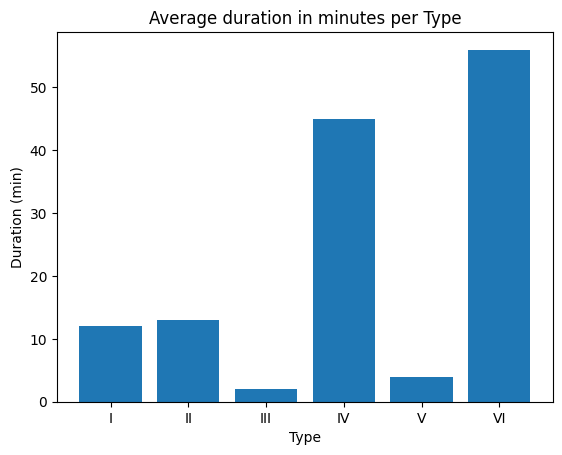

In [21]:
# Average duration per type of burst
avg_duration_type = burst_list.groupby('type').duration.mean().dt.seconds // 60
plt.bar(avg_duration_type.index, avg_duration_type)
plt.xlabel('Type')
plt.ylabel('Duration (min)')
plt.title('Average duration in minutes per Type')
plt.show()

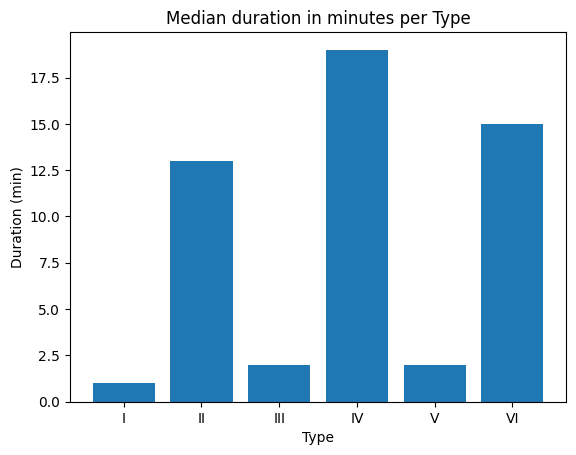

In [22]:
median_duration_type = burst_list.groupby('type').duration.median().dt.seconds // 60
plt.bar(median_duration_type.index, median_duration_type)
plt.xlabel('Type')
plt.ylabel('Duration (min)')
plt.title('Median duration in minutes per Type')
plt.show()